In [2]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [4]:
%run 'time.ipynb'

In [5]:
#events_full = pd.read_csv("../download/events.csv", nrows=10, header=0, names=['id','u','doc','time','p','geo'], usecols=['u','geo'])
events_full = pd.read_csv("../download/events.csv", nrows=10)
events_full.head()

,display_id,uuid,document_id,timestamp,platform,geo_location
0,1,cb8c55702adb93,379743,61,3,US>SC>519
1,2,79a85fa78311b9,1794259,81,2,US>CA>807
2,3,822932ce3d8757,1179111,182,2,US>MI>505
3,4,85281d0a49f7ac,1777797,234,2,US>WV>564
4,5,8d0daef4bf5b56,252458,338,2,SG>00


In [9]:
events = pd.read_csv("../download/events.csv", dtype={'geo_location':str, 'platform':str}, usecols=['display_id', 'document_id', 'timestamp', 'platform', 'geo_location'])
events.head()

,display_id,document_id,timestamp,platform,geo_location
0,1,379743,61,3,US>SC>519
1,2,1794259,81,2,US>CA>807
2,3,1179111,182,2,US>MI>505
3,4,1777797,234,2,US>WV>564
4,5,252458,338,2,SG>00


In [10]:
events.count()

display_id      23120126
document_id     23120126
timestamp       23120126
platform        23120126
geo_location    23119786
dtype: int64

In [11]:
events[events['platform'].str.contains("\N")]

,display_id,document_id,timestamp,platform,geo_location
303065,303066,968149,28799999,\N,US>VA>511
11328495,11328496,1827718,752399961,\N,US>KY>529
13489552,13489553,2624774,896400000,\N,US>IN>527
14004327,14004328,635051,921599944,\N,US>NY>501
15056921,15056922,2746860,997199999,\N,US>MA>506


Grouping

In [17]:
events_grouped = pd.DataFrame({'size':events.groupby(['document_id', 'platform', 'geo_location']).size()}).reset_index()
events_grouped['size'].describe()

count    1.047259e+07
mean     2.207647e+00
std      1.806853e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.706500e+04
Name: size, dtype: float64

In [20]:
events_grouped = pd.DataFrame({'size':events.groupby(['document_id', 'geo_location']).size()}).reset_index()
events_grouped['size'].describe()

count    8.453033e+06
mean     2.735088e+00
std      2.275531e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.739400e+04
Name: size, dtype: float64

In [18]:
events_grouped = pd.DataFrame({'size':events.groupby(['document_id', 'platform']).size()}).reset_index()
events_grouped['size'].describe()

count    1.685041e+06
mean     1.372081e+01
std      3.358049e+02
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      5.000000e+00
max      2.297260e+05
Name: size, dtype: float64

In [19]:
events_grouped = pd.DataFrame({'size':events.groupby(['document_id']).size()}).reset_index()
events_grouped['size'].describe()

count    894060.000000
mean         25.859703
std         555.219403
min           1.000000
25%           1.000000
50%           2.000000
75%           8.000000
max      319203.000000
Name: size, dtype: float64

Timestamp

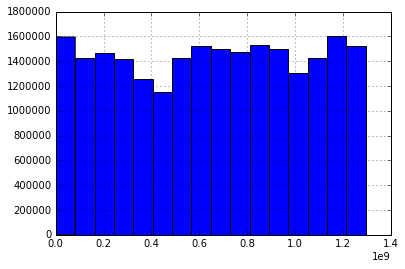

In [6]:
events['timestamp'].hist(bins=16)

In [7]:
events['day'] = events['timestamp'].apply(time_day)
events.head()

,display_id,document_id,timestamp,day
0,1,379743,61,14
1,2,1794259,81,14
2,3,1179111,182,14
3,4,1777797,234,14
4,5,252458,338,14


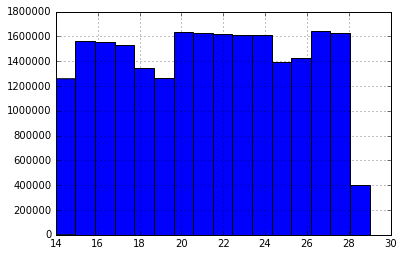

In [8]:
events['day'].hist(bins=16)